# Titanic Logistic Regression

Combined emphasis with **asterisks and _underscores_**.
Strikethrough uses two tildes. ~~Scratch this.~~

## Import Libraries

* Numpy
* Pandas
* matplotlib
* scikit-learn

In [3]:
# Explain reason for imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.calibration import calibration_curve
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve, ShuffleSplit, validation_curve

## Load Datasets

In the prior tutorials the titanic data was split into **train** and **test** datasets for use in traditional statistical modeling. A small amount of preprocessing was performed to simplify fields used in the models and to remove records with missing data. In the following section we load the two datasets into dataframes and recreate a joined train_test dataset.

In [4]:
train = pd.read_csv("/titanic/train.csv")
test = pd.read_csv("/titanic/test.csv")

## Preprocess Data

Change ohe to function/class and explain. Possibly include stateful transforms.

In [5]:
y_train = train.pop('Survived')
y_test = test.pop('Survived')

categoricals = ['Sex', 'Embarked']

X_train = pd.get_dummies(train, columns=categoricals, prefix=categoricals, drop_first=True)
X_test = pd.get_dummies(test, columns=categoricals, prefix=categoricals, drop_first=True)

## Create Estimators

#### Estimators
* LogisticRegression: 
* LogisticRegressionCV: 

#### Parameters
* C: 2025
* solver: saga 
* max_iter: 10000
* penalty: l1, l2, elasticnet
* l1_ratio: 0.0, 0.5, 1.0
* n_jobs: -1
* scoring (CV only): 

In [6]:
# Explain LR and LRCV
clf = LogisticRegression(C=1.0,
                         fit_intercept=True,
                         dual=False,
                         penalty="l2",
                         solver="saga",
                         max_iter=10000,
                         class_weight=None,
                         n_jobs=None,
                         verbose=0,
                         intercept_scaling=1,
                         multi_class="auto",
                         random_state=None,
                         warm_start=False,
                         l1_ratio=None).fit(X_train, y_train)

clf_cv = LogisticRegressionCV(Cs=10000,
                              fit_intercept=True,
                              cv=None,
                              dual=False,
                              penalty="elasticnet",
                              scoring="roc_auc", # Changed to roc_auc for reasons
                              solver="saga",
                              tol=1e-4,
                              max_iter=10000,
                              class_weight=None,
                              n_jobs=-1,
                              verbose=0,
                              refit=True,
                              intercept_scaling=1,
                              multi_class="auto",
                              random_state=None,
                              l1_ratios=[0.0, 0.5, 1.0]
                             ).fit(X_train, y_train)

In [11]:
print("intercept: ",clf_cv.intercept_)
with np.printoptions(precision=3, suppress=True):
    print("coefficients: ", clf_cv.coef_)
print("optimized 'C': ",clf_cv.C_)
with np.printoptions(precision=3, suppress=True):
    print("decision distance: ", clf_cv.decision_function(X_test))

intercept:  [0.83116863]
coefficients:  [[-0.232 -0.011 -0.229  0.074  0.014 -1.359 -0.092 -0.   ]]
optimized 'C':  [0.87336165]
optimized l1 ratio:  [0.]
confidence intervals:  [ 0.138  0.322 -1.189 -0.012 -0.587 -0.185 -0.276 -1.348  0.191  0.323
 -0.699 -1.336 -0.18   2.398 -0.686  0.187 -1.432 -1.04   0.894  0.048
 -1.723  0.142 -1.54  -0.976 -1.47  -1.145 -0.895 -1.024 -1.496 -1.508
  0.329 -1.254 -0.027 -1.145  1.562 -1.113 -1.368 -0.196  7.144 -1.199
 -1.358  3.472 -1.225  3.64  -1.413  0.363  1.282 -0.874 -1.614  1.969
  3.353 -1.09  -1.211 -1.402  1.176 -0.088 -1.388 -0.195  0.387 -1.359
 -0.191  0.279  0.06   0.236  0.451 -1.093 -0.321 -0.755  0.028 -1.675
 -1.686 -1.381 -0.744 -0.799 -1.468 -0.039 -1.544 -0.331 -0.098  0.282
 -0.     0.398 -1.468  0.17   1.627 -1.597 -0.785  0.271 -1.557 -1.135
 -1.385 -1.402 -1.336 -1.325 -0.014 -1.565 -1.617 -1.318 -0.558 -1.059
 -1.597 -1.068 -1.386 -1.325 -0.365  3.139  0.067  3.607 -1.456 -1.046
 -1.294  0.954 -1.037 -1.391 -0.087 -1.40

## Generate ROC plots

The following two ROC plots show that after applying cross-validation to the **C** and **l1_ratios** hyperparameters, the AUC score has increased slightly.

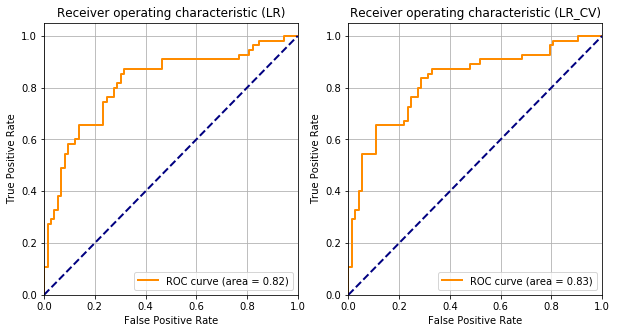

In [31]:
def plot_roc_curve(estimator, title, X, y, axes, pos):
    probs = estimator.predict_proba(X)
    fpr, tpr, _ = roc_curve(y_true=y.ravel(), y_score=probs[:,1].ravel())
    roc_auc = auc(fpr, tpr)

    axes[pos].set_title(title)
    axes[pos].set_xlim([0.0, 1.0])
    axes[pos].set_ylim([0.0, 1.05])
    axes[pos].set_xlabel("False Positive Rate")
    axes[pos].set_ylabel("True Positive Rate")
    axes[pos].grid()
    axes[pos].plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    axes[pos].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    axes[pos].legend(loc="lower right")

    return plt
    
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

plot_roc_curve(estimator=clf, title='Receiver operating characteristic (LR)', X=X_test, y=y_test, axes=axes, pos=0)
plot_roc_curve(estimator=clf_cv, title='Receiver operating characteristic (LR_CV)', X=X_test, y=y_test, axes=axes, pos=1)

plt.show()

## Generate Precision-Recall plots

The following two ROC plots show that after applying cross-validation to the C and l1_ratios hyperparameters, the AUC score has increased slightly.

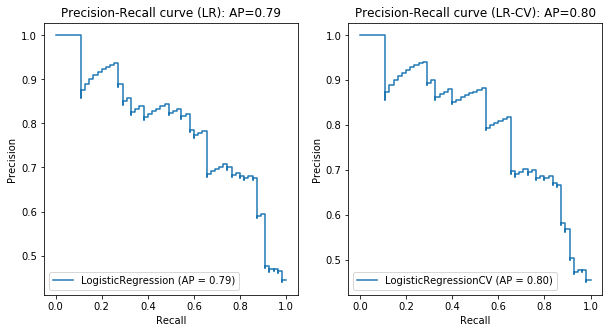

In [45]:
def plot_pr_curve(estimator, title, X, y, axes, pos):
    probs = estimator.predict_proba(X)
    average_precision = average_precision_score(y, probs[:,1])
    disp = plot_precision_recall_curve(estimator, X, y, ax=axes[pos])
    disp.ax_.set_title(title + '{0:0.2f}'.format(average_precision))
    
    return disp

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

plot_pr_curve(estimator=clf, title='Precision-Recall curve (LR): AP=', X=X_test, y=y_test, axes=axes, pos=0)
plot_pr_curve(estimator=clf_cv, title='Precision-Recall curve (LR-CV): AP=', X=X_test, y=y_test, axes=axes, pos=1)

plt.show()

## Generate Probability Calibration plots

The probabilities output from a logistic regression model should resemble the actual probabilities from observations within a given decile.

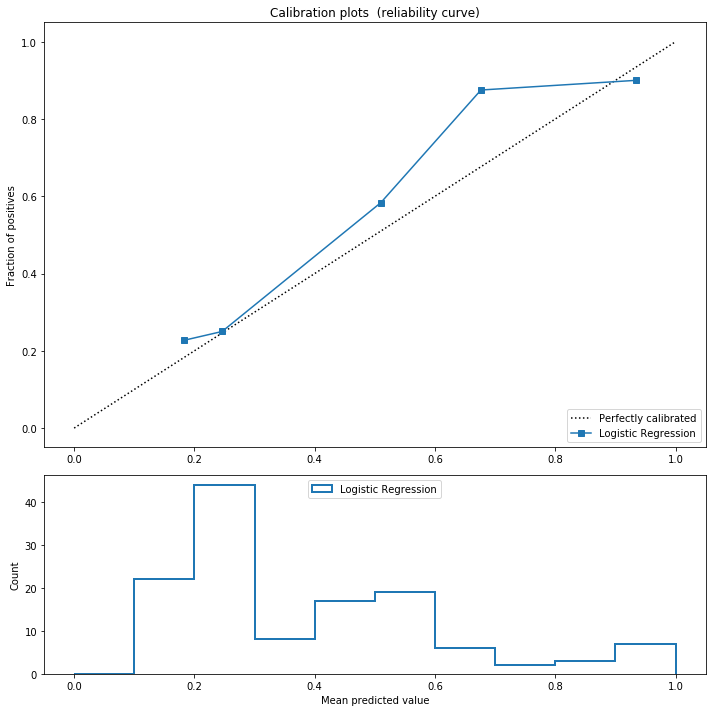

In [84]:
# Clean up this section
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

probs = clf.predict_proba(X_test)

fraction_of_positives, mean_predicted_value = calibration_curve(y_true=y_test,
                                                                y_prob=probs[:,1], 
                                                                n_bins=5,
                                                                strategy="uniform")

ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % ("Logistic Regression", ))
ax2.hist(probs[:,1], range=(0, 1), bins=10, label="Logistic Regression", histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

## Generate Confusion Matrix plots

The following two confusion matrices show that after applying cross-validation to the C and l1_ratios hyperparameters, the standard model performs slightly better in the true negative rate. This may seem counterintuitive because of the higher AUC under the cross-validated model. It is important to note that the confusion matrix generated by sklearn uses a cutoff of 0.50 to classify an observation. A cutoff of 0.50 may not be optimal given the cost of a false positive or false negative.

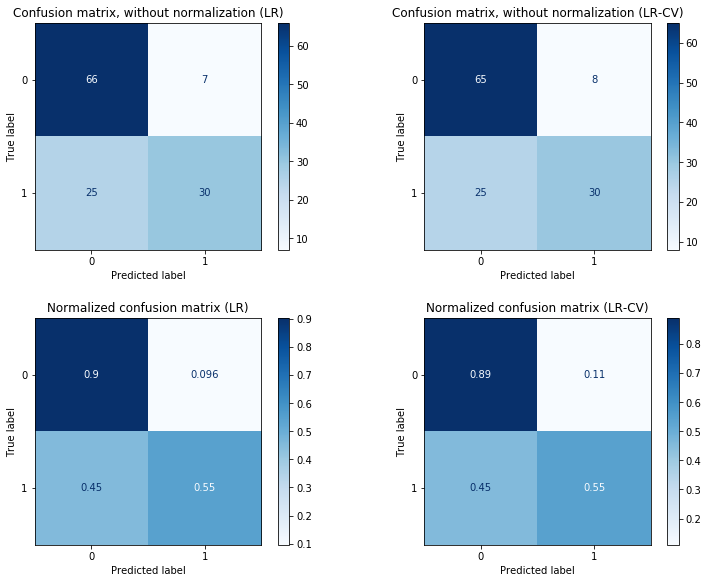

In [82]:
# Explain confusion matrix
def plot_cf_matrix(estimator, suffix, X, y, axes, pos):
    titles_options = [("Confusion matrix, without normalization " + suffix, None, 0),
                  ("Normalized confusion matrix " + suffix, 'true', 1)]
    for title, normalize, row in titles_options:
        disp = plot_confusion_matrix(estimator, X, y,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize,
                                     ax=axes[row, pos])
        disp.ax_.set_title(title)

    return disp

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12.8, 9.6))
fig.subplots_adjust(hspace=0.3)

plot_cf_matrix(estimator=clf, suffix='(LR)', X=X_test, y=y_test, axes=axes, pos=0)
plot_cf_matrix(estimator=clf_cv, suffix='(LR-CV)', X=X_test, y=y_test, axes=axes, pos=1)

plt.show()

## Generate Learning Curve plot

In [ ]:
# Clean up section, create functions, move back to "C"

param_range = np.linspace(0, 5000, 100)

estimator = LogisticRegression(C=2025.0,
                               fit_intercept=True,
                               dual=False,
                               penalty="l2",
                               solver="saga",
                               max_iter=10000,
                               class_weight=None,
                               n_jobs=None,
                               verbose=0,
                               intercept_scaling=1,
                               multi_class="auto",
                               random_state=None,
                               warm_start=True,
                               l1_ratio=None)

train_scores, test_scores = validation_curve(
    estimator, X, y, param_name="C", param_range=param_range,
    scoring="roc_auc", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("l1_ratio")
plt.ylabel("Score")
plt.ylim(0.75, 0.90)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## Generate Parameter Tuning plot

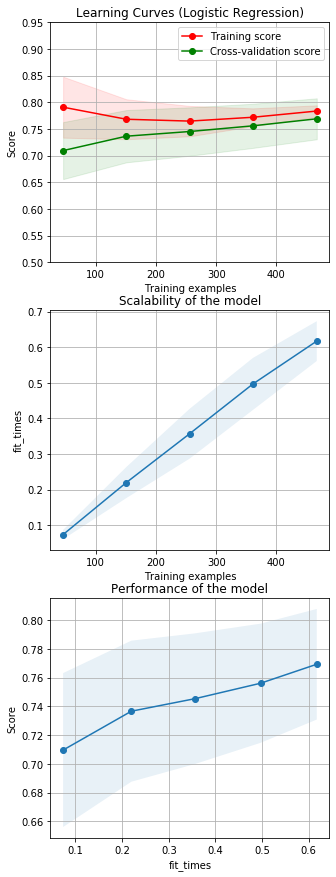

In [88]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 15))

cv = ShuffleSplit(n_splits=200, test_size=0.2, random_state=0)

estimator = LogisticRegression(C=2025.0,
                               fit_intercept=True,
                               dual=False,
                               penalty="l2",
                               solver="saga",
                               max_iter=10000,
                               class_weight=None,
                               n_jobs=None,
                               verbose=0,
                               intercept_scaling=1,
                               multi_class="auto",
                               random_state=None,
                               warm_start=True,
                               l1_ratio=None)

plot_learning_curve(estimator, title="Learning Curves (Logistic Regression)", X_train, y_train, axes=axes, ylim=(0.50, 0.95), cv=cv, n_jobs=-1)

plt.show()